https://www.kaggle.com/datasets/ihelon/coffee-sales/data

Tasks:

-Time Series Exploratory Data Analysis

-Next day/week/month sales

-Specific customer purchases

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

file_path = 'index.csv'

data = pd.read_csv(file_path)

data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [14]:
data.describe()

,money
count,2175.000000
mean,31.725297
std,5.161150
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


Średnio za kawę klienci płacili 31,73грн.

Zbadamy teraz ile klienci wydawali pieniędzy na przestrzeni czasu.

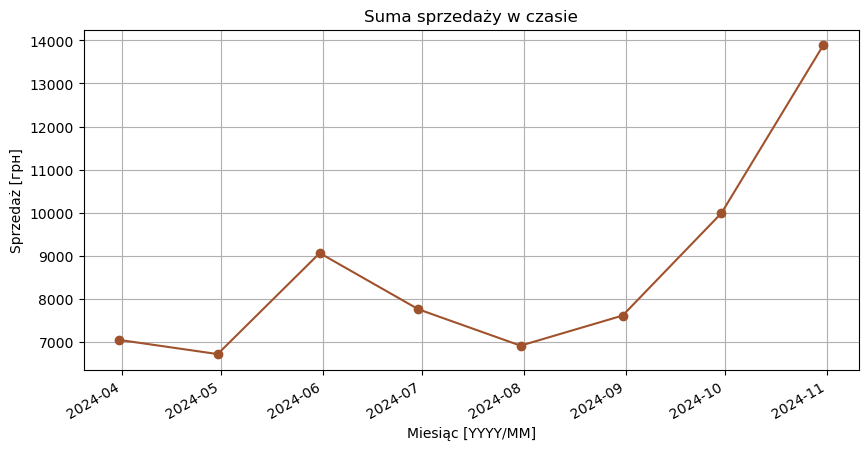

In [15]:
import matplotlib.dates as mdates

data['date'] = pd.to_datetime(data['date'])
data_monthly = data.resample('M', on='date').sum()

plt.figure(figsize=(10, 5))
plt.plot(data_monthly.index, data_monthly['money'], marker='o', color='sienna')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.gcf().autofmt_xdate()

plt.xlabel("Miesiąc [YYYY/MM]")
plt.ylabel("Sprzedaż [грн]")
plt.title("Suma sprzedaży w czasie")
plt.grid(True)
plt.show()

Na zamieszczonym wykresie widać ewidentnie tendecję wzrostową od sierpnia. Wynikać to może z początku sezonu jesienno-zimowego.

Sprawdzimy teraz o której godzinie klienci najczęściej odwiedzali kawiarnię.

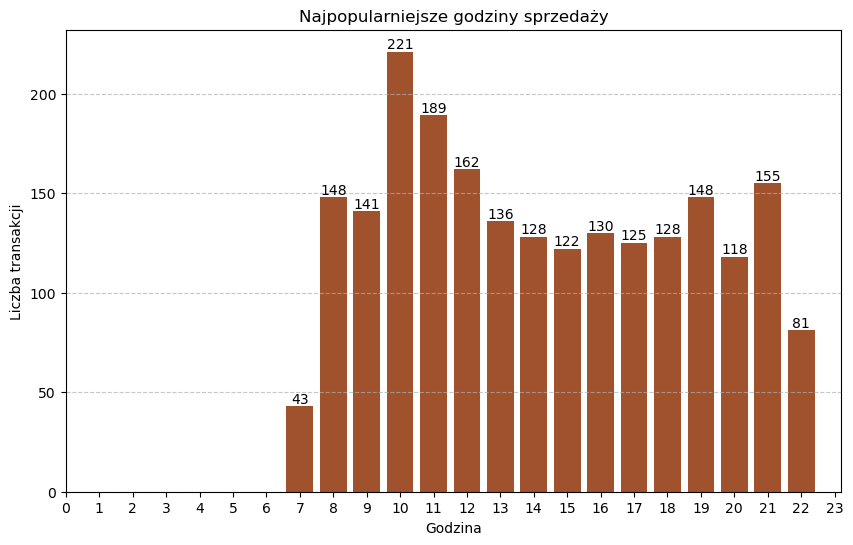

In [16]:
data['datetime'] = pd.to_datetime(data['datetime'])

data['hour'] = data['datetime'].dt.hour

hourly_counts = data['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(hourly_counts.index, hourly_counts.values, color='sienna')

for bar, count in zip(bars, hourly_counts):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{count}',
        ha='center',
        va='bottom'
    )

plt.xlabel("Godzina")
plt.ylabel("Liczba transakcji")
plt.title("Najpopularniejsze godziny sprzedaży")
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Zaobserwować można największą ilość w godzinach przedpołudniowych (10-12), co jest zrozumiałe ponieważ najczęściej kawę pije się rano, aby się rozbudzić.

Przeanalizujemy jaki typ kawy najczęściej spożywano.

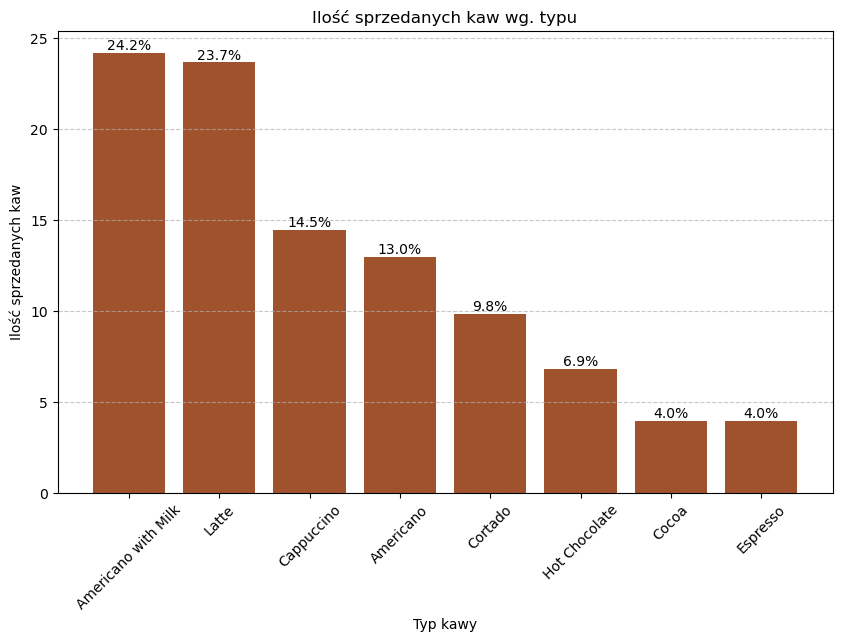

In [17]:
coffee_counts = data['coffee_name'].value_counts()
coffee_percentages = (coffee_counts / coffee_counts.sum()) * 100  # Obliczanie procentów

plt.figure(figsize=(10, 6))
bars = plt.bar(coffee_percentages.index, coffee_percentages, color='sienna')

for bar, percentage in zip(bars, coffee_percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{percentage:.1f}%',
        ha='center',
        va='bottom'
    )

plt.xlabel("Typ kawy")
plt.ylabel("Ilość sprzedanych kaw")
plt.title("Ilość sprzedanych kaw wg. typu")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Jak widać dominują kawy typowo mleczne(klasyczne).

Porównamy teraz jak zmieni się wykres, gdy zamiast ilości sprzedaży podamy utarg.

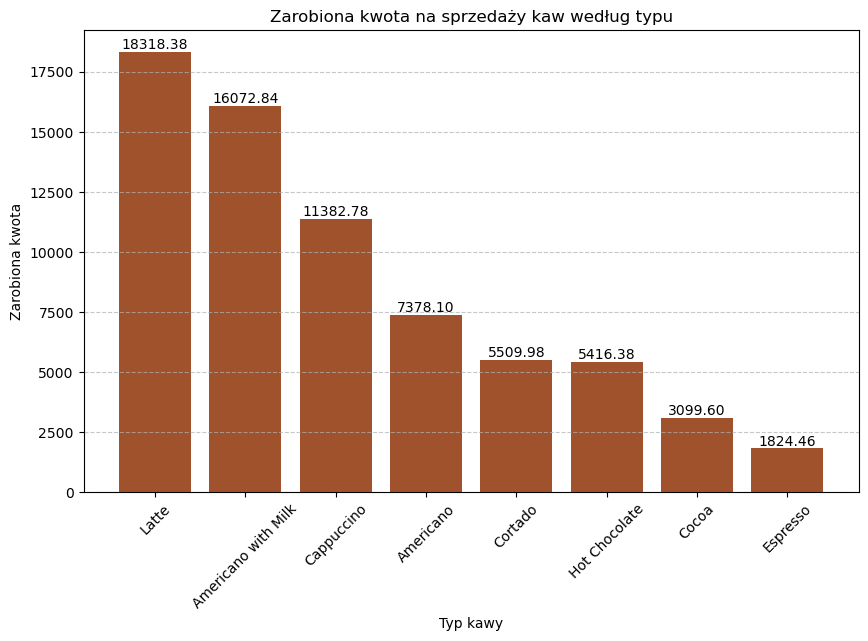

In [18]:
coffee_revenue = data.groupby('coffee_name')['money'].sum()

coffee_revenue = coffee_revenue.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(coffee_revenue.index, coffee_revenue, color='sienna')

for bar, revenue in zip(bars, coffee_revenue):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{revenue:.2f}',
        ha='center',
        va='bottom'
    )

plt.xlabel("Typ kawy")
plt.ylabel("Zarobiona kwota")
plt.title("Zarobiona kwota na sprzedaży kaw według typu")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Pomimo mniejszej ilości sprzedanych kaw typu 'latte', to właśnie one stanowią największy % zysków.

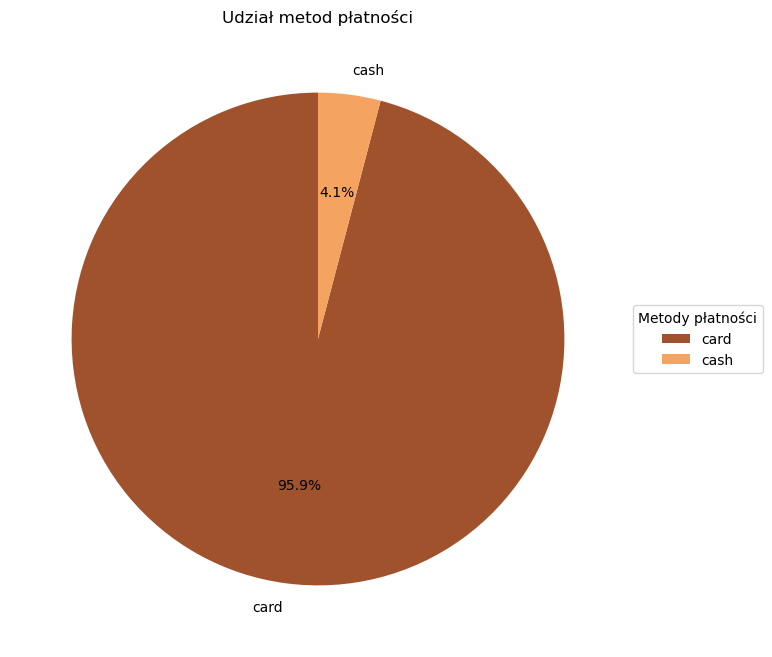

In [19]:
payment_counts = data['cash_type'].value_counts()

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90, colors=['sienna', 'sandybrown']
)

plt.legend(wedges, payment_counts.index, title="Metody płatności", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.title("Udział metod płatności")
plt.show()

Sprawdzimy teraz jaki jest udział w zyskach każdego rodzaju płatności.

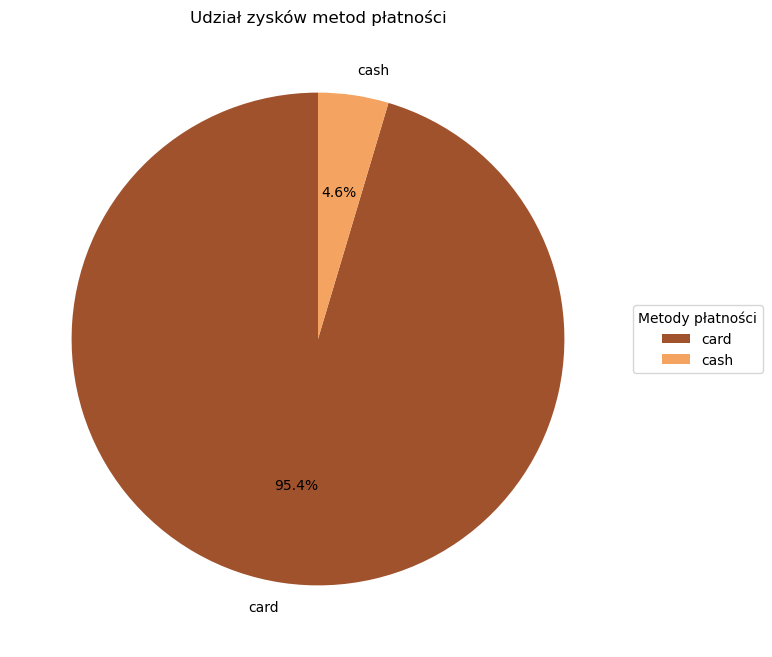

In [20]:
revenue_by_payment_type = data.groupby('cash_type')['money'].sum()

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    revenue_by_payment_type, labels=revenue_by_payment_type.index, autopct='%1.1f%%', startangle=90, colors=['sienna', 'sandybrown']
)

plt.legend(wedges, revenue_by_payment_type.index, title="Metody płatności", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Udział zysków metod płatności")
plt.show()

In [21]:
card_stats = data[data['cash_type'] == 'card']['money'].describe()

cash_stats = data[data['cash_type'] == 'cash']['money'].describe()

print("Statystyki dla płacących kartą:\n", card_stats)
print("\nStatystyki dla płacących gotówką:\n", cash_stats)

Statystyki dla płacących kartą:
 count    2086.000000
mean       31.551544
std         5.100828
min        18.120000
25%        27.920000
50%        32.820000
75%        35.760000
max        38.700000
Name: money, dtype: float64

Statystyki dla płacących gotówką:
 count    89.000000
mean     35.797753
std       4.910980
min      24.000000
25%      30.000000
50%      39.000000
75%      40.000000
max      40.000000
Name: money, dtype: float64


### Podsumowanie

1. **Obsługa płatności kartą**  
   Mimo że klienci płacący gotówką wydają średnio więcej, ich liczba jest zbyt mała, aby miała istotny wpływ na całość zysków. Większość transakcji dokonywana jest kartą, dlate **sprawny terminal płatniczy jest kluczy** dla utrzymania płynności sprzedaży i wygody klientów.

2. **Podniesienie kompetencji baristów**  
   Warto rozważyć dodatkowe szkolenia dla baristów, szczególnie w zakresie przygotowywania kaw mlecznych. Wyższa jakość w tej kategorii może znacząco wpłynąć na satysfakcję klientów i zwiększyć ich skłonność do ponownych wizyt.

3. **Wzmocnienie zespołu na sezon jesienno-zimowy**  
   Od września/października, kiedy następuje wzrost obłożenia, warto zatrudnić dodatkowe osoby. Zwiększenie liczby personelu pozwoli na lepszą obsługę klientów w okresie zwiększonego ruchu, co może pozytywnie wpłynąć na przychody i wizerunek maie sprzedaży.
